In [2]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
sns.set_style('dark')

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/Users/jlee0/Desktop/KYU/deep learning/kaggle/loan/Loan payments data.csv')

In [6]:
def my_read_file(filename):
    df = pd.read_csv(filename)
    print("{}: Reading {}.".format(now(), filename))
    print("{}: The data contains {} observations with {} columns".format(now(), df.shape[0], df.shape[1]))
    return df

def now():
    tmp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    return tmp

# Self-defined function to read dataframe and find the missing data on the columns and # of missing
def checking_na(df):
    try:
        if (isinstance(df, pd.DataFrame)):
            df_na_bool = pd.concat([df.isnull().any(), df.isnull().sum(), (df.isnull().sum()/df.shape[0])*100],
                                   axis=1, keys=['df_bool', 'df_amt', 'missing_ratio_percent'])
            df_na_bool = df_na_bool.loc[df_na_bool['df_bool'] == True]
            return df_na_bool
        else:
            print("{}: The input is not panda DataFrame".format(now()))

    except (UnboundLocalError, RuntimeError):
        print("{}: Something is wrong".format(now()))

In [7]:
loan_data = my_read_file('C:/Users/jlee0/Desktop/KYU/deep learning/kaggle/loan/Loan payments data.csv')
print("\n\n")
print(checking_na(loan_data))

2020-11-23 11:06:02: Reading C:/Users/jlee0/Desktop/KYU/deep learning/kaggle/loan/Loan payments data.csv.
2020-11-23 11:06:02: The data contains 500 observations with 11 columns



               df_bool  df_amt  missing_ratio_percent
paid_off_time     True     100                   20.0
past_due_days     True     300                   60.0


In [6]:
loan_data.head(2)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female


이미 돈을 지불한 사람은 past_due_days값이 null인 것을 확인할 수 있다.

##### 1. Loan_ID

고객을 식별하는 데이터로 매 고객마다 다르다.

후에 모델링 직전에 drop할 것이다.

##### 2. Loan_status

실제 타겟이라고 생각하면 될 것이다.

In [9]:
print(loan_data.loan_status.unique())

['PAIDOFF' 'COLLECTION' 'COLLECTION_PAIDOFF']


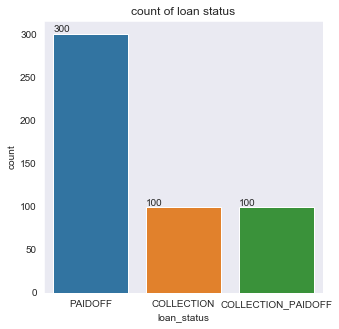

In [17]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(loan_data.loan_status)
ax.set_title('count of loan status')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))
    
plt.show()

##### 3. principal

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

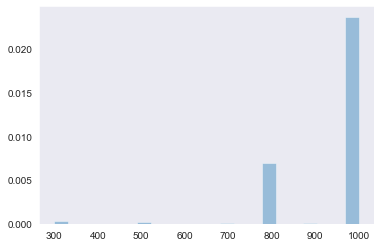

In [21]:
sns.distplot(loan_data.Principal)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

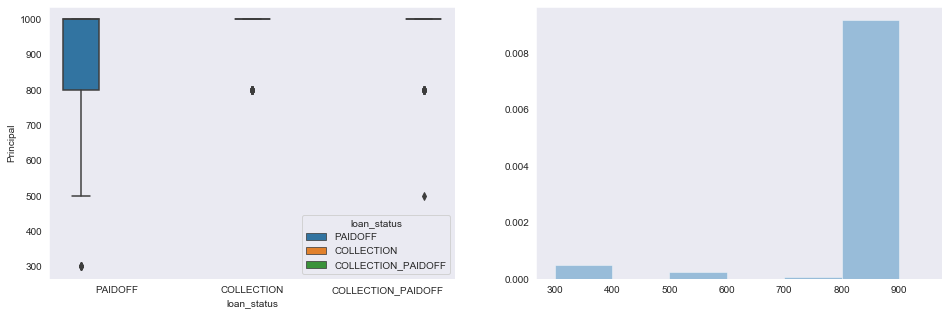

In [24]:
fig, axs = plt.subplots(1,2,figsize = (16,5))
sns.boxplot(x = 'loan_status',y = 'Principal',data = loan_data,hue = 'loan_status',ax = axs[0])
sns.distplot(loan_data.Principal, bins = range(300,1000,100),ax=axs[1],kde = True)
plt.show();

In [25]:
print(loan_data[['loan_status','Principal','Loan_ID']].groupby(['loan_status','Principal']).agg(['count']))

                             Loan_ID
                               count
loan_status        Principal        
COLLECTION         800            23
                   1000           77
COLLECTION_PAIDOFF 500             1
                   800            19
                   1000           80
PAIDOFF            300             6
                   500             2
                   700             1
                   800            69
                   900             2
                   1000          220


##### 4.Terms

대출 상환에 걸리는 기간을 설정한 것이다.

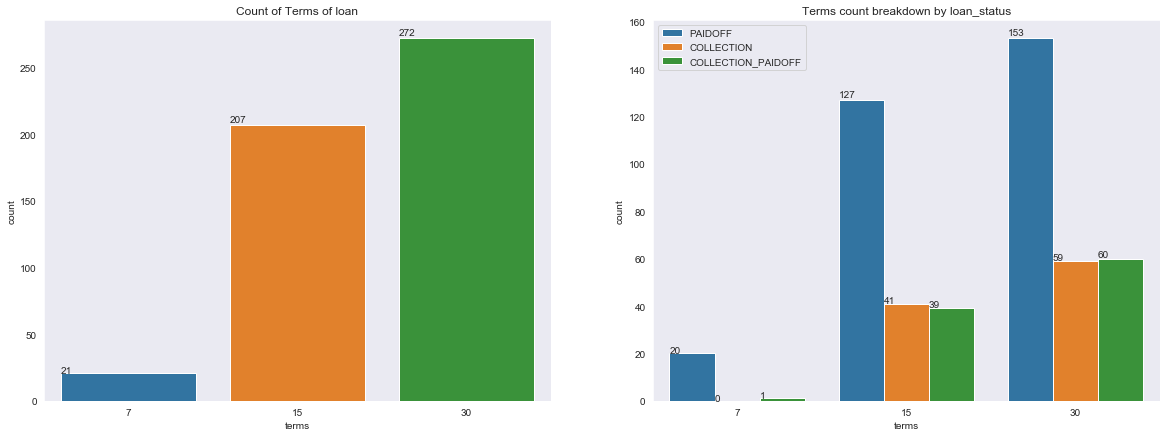

In [28]:
fig, axs = plt.subplots(1,2,figsize = (20,7))
sns.countplot(loan_data.terms,ax= axs[0])
axs[0].set_title('Count of Terms of loan')
for p in axs[0].patches:
    axs[0].annotate(str(format(int(p.get_height()),',d')),(p.get_x(),p.get_height()*1.01))

sns.countplot(x= 'terms',hue = 'loan_status',data = loan_data,ax = axs[1])
axs[1].set_title('Terms count breakdown by loan_status')
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate(0,(t.get_x(),0))
    else:
        axs[1].annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()*1.01))
        
axs[1].legend(loc = 'upper left')
plt.show();

##### 5,6,7,8 effective_date, due_date, paid_off_time, past_due_days

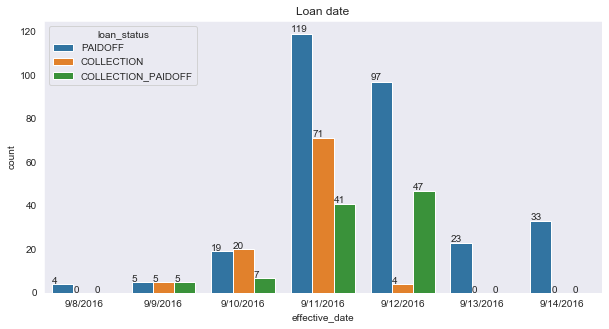

In [10]:
fig = plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'effective_date',hue= 'loan_status',data=loan_data)
ax.set_title('Loan date')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0,(t.get_x(),0))
    else:
        ax.annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height() * 1.01))
plt.show();


9월에 가장 많은 대출이 있었다

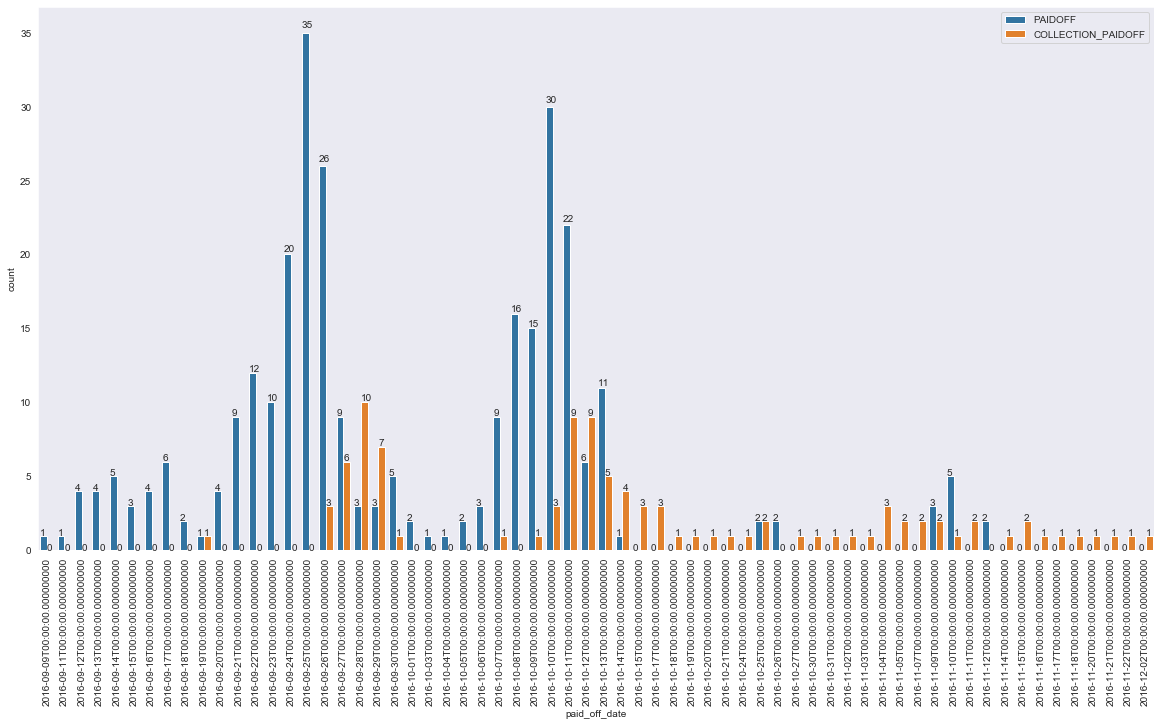

In [16]:
loan_data['paid_off_date'] = pd.DatetimeIndex(loan_data.paid_off_time).normalize()
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'paid_off_date',data = loan_data.loc[loan_data.loan_status.isin(['COLLECTION_PAIDOFF','PAIDOFF'])], hue = 'loan_status')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
for t in ax.patches:
    if(np.isnan(float(t.get_height()))):
        ax.annotate(0,(t.get_x(),0))
    else:
        ax.annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()*1.01))
ax.legend(loc = 'upper right')
plt.show();

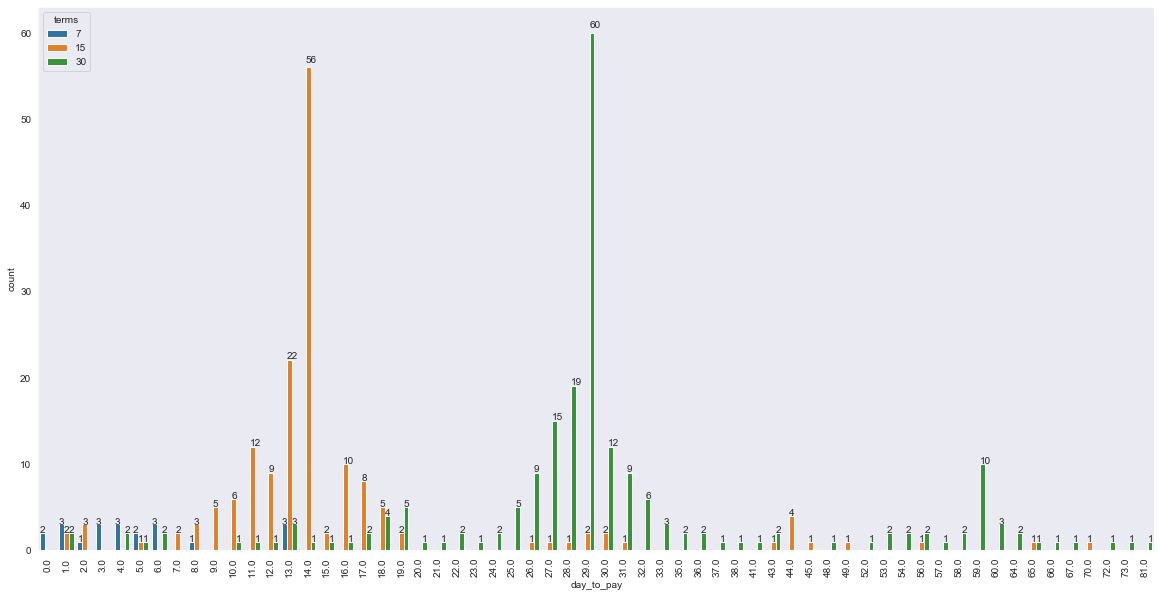

In [18]:
loan_data['day_to_pay'] = (pd.DatetimeIndex(loan_data.paid_off_time).normalize() - pd.DatetimeIndex(loan_data.effective_date).normalize()) / np.timedelta64(1,'D')

fig = plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'day_to_pay',hue= 'terms',data=loan_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('',(t.get_x(),0))
    else:
        ax.annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()* 1.01))
        
plt.show();

미리미리 갚는 사람은 많지 않고 거의 모든 사람이 직전에 상환한다

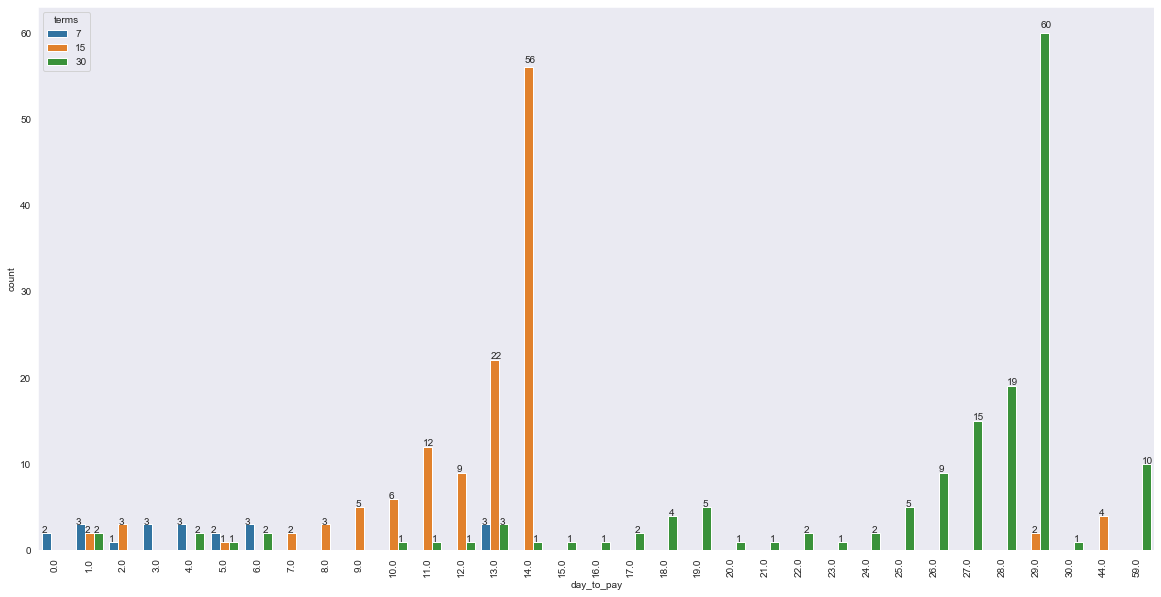

In [19]:
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(x = 'day_to_pay',hue = 'terms',data = loan_data[loan_data.loan_status == 'PAIDOFF'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('',(t.get_x(),0))
    else:
        ax.annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()*1.01))
        
plt.show();

..? 기간이 지났는데도 paidoff라고 기록된 자료들이 있는 듯하다. 

확인해보자

In [23]:
tmp = loan_data.loc[(loan_data.day_to_pay > 30) & (loan_data.loan_status == 'PAIDOFF')]
print("{}: Incorrect status : {} observation".format(now(),tmp.shape[0]))
print(tmp[['loan_status','terms','effective_date','due_date','paid_off_time','day_to_pay']])

2020-11-23 11:33:18: Incorrect status : 14 observation
    loan_status  terms effective_date    due_date     paid_off_time  \
85      PAIDOFF     30      9/11/2016   11/9/2016    11/9/2016 9:00   
111     PAIDOFF     30      9/11/2016   11/9/2016    11/9/2016 9:00   
122     PAIDOFF     15      9/11/2016  10/25/2016   10/25/2016 9:00   
137     PAIDOFF     15      9/11/2016  10/25/2016   10/25/2016 9:00   
146     PAIDOFF     30      9/11/2016   11/9/2016   11/9/2016 23:00   
150     PAIDOFF     15      9/12/2016  10/26/2016   10/26/2016 9:00   
165     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 16:00   
196     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00   
206     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00   
215     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 16:00   
222     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00   
230     PAIDOFF     15      9/12/2016  10/26/2016   10/26/2016 9:00   
272     PAIDOFF     30

##### 9,10,11 age, education, gender

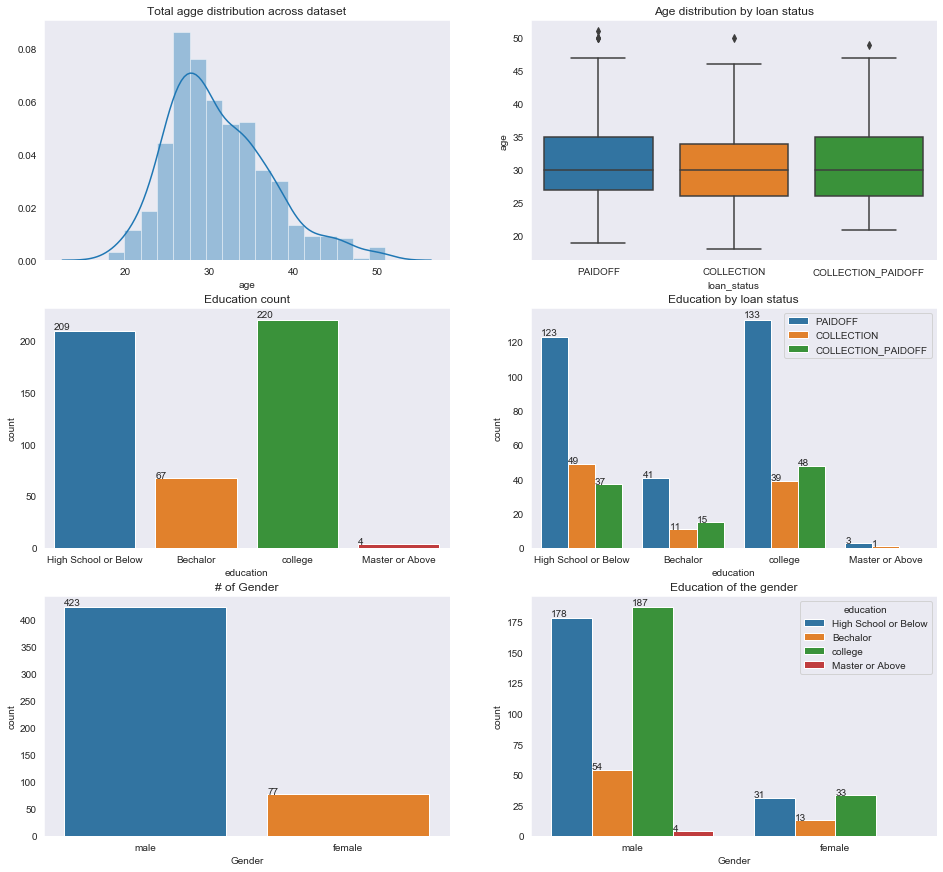

In [36]:
fig, axs = plt.subplots(3,2,figsize = (16,15))
sns.distplot(loan_data.age,ax = axs[0][0])
axs[0][0].set_title('Total agge distribution across dataset')
sns.boxplot(x='loan_status',y='age',data= loan_data,ax = axs[0][1])
axs[0][1].set_title('Age distribution by loan status')
sns.countplot(x = 'education',data = loan_data,ax = axs[1][0])
axs[1][0].set_title('Education count')
for t in axs[1][0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1][0].annotate('',(t.get_x(),0))
    else:
        axs[1][0].annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()*1.01))
        
sns.countplot(x = 'education',data = loan_data,hue ='loan_status',ax = axs[1][1])
axs[1][1].set_title('Education by loan status')
for t in axs[1][1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1][1].annotate('',(t.get_x(),0))
    else:
        axs[1][1].annotate(str(format(int(t.get_height()),',d')),(t.get_x(),t.get_height()* 1.01))
        
axs[1][1].legend(loc='upper right')
sns.countplot(x='Gender', data=loan_data, ax=axs[2][0])
axs[2][0].set_title("# of Gender")
for t in axs[2][0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[2][0].annotate('', (t.get_x(), 0))
    else:
        axs[2][0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='Gender', data=loan_data, hue='education', ax=axs[2][1])
axs[2][1].set_title("Education of the gender")
for t in axs[2][1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[2][1].annotate('', (t.get_x(), 0))
    else:
        axs[2][1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

plt.show();

In [37]:
pd.crosstab(loan_data.loan_status, loan_data.Gender + '_' + loan_data.education, margins = True)

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0,7,3,11,42,1,36,100
COLLECTION_PAIDOFF,1,5,8,14,32,0,40,100
PAIDOFF,12,19,22,29,104,3,111,300
All,13,31,33,54,178,4,187,500


In [38]:
pd.crosstab(loan_data.loan_status, loan_data.Gender + '_' + loan_data.education, margins = True, normalize = 'all')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000,0.014,0.006,0.022,0.084,0.002,0.072,0.2
COLLECTION_PAIDOFF,0.002,0.010,0.016,0.028,0.064,0.000,0.080,0.2
PAIDOFF,0.024,0.038,0.044,0.058,0.208,0.006,0.222,0.6
All,0.026,0.062,0.066,0.108,0.356,0.008,0.374,1.0


In [39]:
pd.crosstab(loan_data.loan_status, loan_data.Gender + '_' + loan_data.education, margins = True, normalize = 'index')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college
loan_status,,,,,,,
COLLECTION,0.000,0.070000,0.030000,0.110000,0.420000,0.010,0.360
COLLECTION_PAIDOFF,0.010,0.050000,0.080000,0.140000,0.320000,0.000,0.400
PAIDOFF,0.040,0.063333,0.073333,0.096667,0.346667,0.010,0.370
All,0.026,0.062000,0.066000,0.108000,0.356000,0.008,0.374


### Modeling

제 시간에 상환을 할 사람들을 예측하겠다

In [45]:
# 대출상환에 오류가 있던 사람들을 정정하겠다. (14명정도 됐다)

loan_data.loc[(loan_data.loan_status == 'PAIDOFF') & (loan_data.day_to_pay > 30), 'loan_status'] = 'COLLECTION_PAIDOFF'

In [46]:
loan_data[loan_data.index == 85]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,paid_off_date,day_to_pay
85,xqd20160086,COLLECTION_PAIDOFF,1000,30,9/11/2016,11/9/2016,11/9/2016 9:00,NaN,33,college,male,2016-11-09,59.0


In [47]:
# paidoff : 1, collection_paidoff + colldection : 0

status_map = {'PAIDOFF' :1, 'COLLECTION' : 0,'COLLECTION_PAIDOFF' : 0}
loan_data['loan_status_trgt'] = loan_data.loan_status.map(status_map)

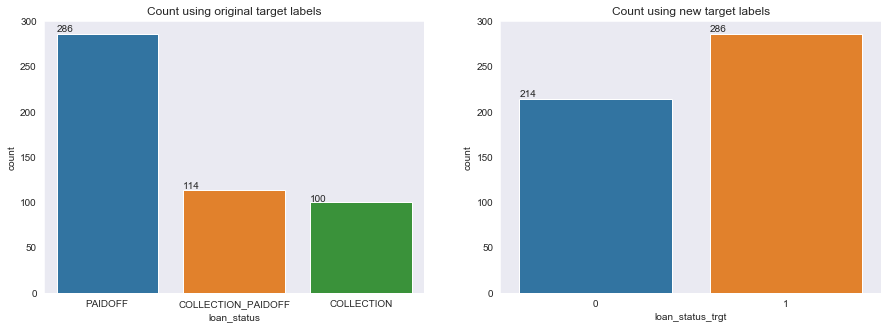

In [49]:

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='loan_status', data=loan_data, ax=axs[0])
axs[0].set_title("Count using original target labels")
for t in axs[0].patches:
    if (np.isnan(float(t.get_height()))):
        axs[0].annotate('', (t.get_x(), 0))
    else:
        axs[0].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

sns.countplot(x='loan_status_trgt', data=loan_data, ax=axs[1])
axs[1].set_title("Count using new target labels")
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate('', (t.get_x(), 0))
    else:
        axs[1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [50]:
dummies = pd.get_dummies(loan_data['education']).rename(columns = lambda x :'is_' + str(x))
loan_data = pd.concat([loan_data,dummies],axis = 1)
loan_data = loan_data.drop(['education'],axis = 1)

dummies = pd.get_dummies(loan_data['Gender']).rename(columns = lambda x:'is_' + str(x))
loan_data = pd.concat([loan_data,dummies],axis = 1)
loan_data = loan_data.drop(['Gender'],axis = 1)

loan_data = loan_data.drop(['Loan_ID', 'loan_status', 'effective_date', 'due_date', 'paid_off_time', 'past_due_days', 'paid_off_date', 'day_to_pay'], axis=1)

더미 변수를 만든 경우에는 다중공산성 문제때문에 더미 변수중 하나를 drop 해야 한다

In [51]:
dummy_var = ['is_female', 'is_Master or Above']
loan_data = loan_data.drop(dummy_var, axis = 1)

print(loan_data.head(2))

   Principal  terms  age  loan_status_trgt  is_Bechalor  \
0       1000     30   45                 1            0   
1       1000     30   50                 1            1   

   is_High School or Below  is_college  is_male  
0                        1           0        1  
1                        0           0        0  


In [52]:
X = loan_data.drop(['loan_status_trgt'], axis=1)
y = loan_data.loan_status_trgt

모델링에는 랜덤포레스트, SVM, keras를 사용하겠다

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

def eval_model_classifier(model, data, target, split_ratio):
    train_X, test_X, train_Y, test_Y = train_test_split(data,target,train_size = split_ratio, random_state = 0)
    model.fit(train_X,train_Y)
    return model.score(test_X,test_Y)

In [55]:
num_estimators_array = np.array([1,5,10,50,100,200,500])
num_smpl = 5
num_grid = len(num_estimators_array)
score_array_mu = np.zeros(num_grid)
score_array_sigma = np.zeros(num_grid)
j=0

print('{} : RandomForestClassification Starts!'.format(now()))
for n_estimators in num_estimators_array:
    score_array = np.zeros(num_smpl)
    for i in range(0,num_smpl):
        rf_class = RandomForestClassifier(n_estimators = n_estimators,n_jobs = 1, criterion = 'gini')
        score_array[i] = eval_model_classifier(rf_class,X,y,0.8)
        print("{}: Try {} with n_estimators = {} and score = {}".format(now(),i, n_estimators,score_array[i]))
    score_array_mu[j], score_array_sigma[j] = np.mean(score_array),np.std(score_array)
    j = j+1
print("{}: RandomForestClassifier Done!".format(now()))

2020-11-23 12:24:33 : RandomForestClassification Starts!
2020-11-23 12:24:33: Try 0 with n_estimators = 1 and score = 0.53
2020-11-23 12:24:33: Try 1 with n_estimators = 1 and score = 0.47
2020-11-23 12:24:33: Try 2 with n_estimators = 1 and score = 0.52
2020-11-23 12:24:33: Try 3 with n_estimators = 1 and score = 0.5
2020-11-23 12:24:33: Try 4 with n_estimators = 1 and score = 0.48
2020-11-23 12:24:33: Try 0 with n_estimators = 5 and score = 0.5
2020-11-23 12:24:33: Try 1 with n_estimators = 5 and score = 0.52
2020-11-23 12:24:33: Try 2 with n_estimators = 5 and score = 0.5
2020-11-23 12:24:33: Try 3 with n_estimators = 5 and score = 0.54
2020-11-23 12:24:33: Try 4 with n_estimators = 5 and score = 0.58
2020-11-23 12:24:33: Try 0 with n_estimators = 10 and score = 0.53
2020-11-23 12:24:33: Try 1 with n_estimators = 10 and score = 0.57
2020-11-23 12:24:33: Try 2 with n_estimators = 10 and score = 0.56
2020-11-23 12:24:33: Try 3 with n_estimators = 10 and score = 0.57
2020-11-23 12:24:3

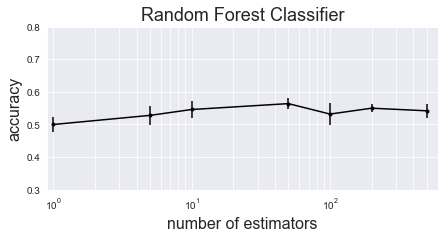

In [56]:
fig = plt.figure(figsize = (7,3))
plt.errorbar(num_estimators_array,score_array_mu,yerr = score_array_sigma, fmt = 'k.-')
plt.xscale("log")
plt.xlabel("number of estimators",size = 16)
plt.ylabel("accuracy",size = 16)
plt.xlim(0.9,600)
plt.ylim(0.3,0.8)
plt.title("Random Forest Classifier", size = 18)
plt.grid(which="both")
plt.show();

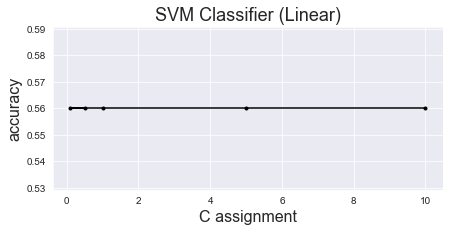

In [57]:
C_array = np.array([0.5, 0.1, 1, 5, 10])
score_array = np.zeros(len(C_array))
i=0
for C_val in C_array:
    svc_class = svm.SVC(kernel='linear', random_state=1, C = C_val)
    score_array[i] = eval_model_classifier(svc_class, X, y, 0.8)
    i=i+1

score_mu, score_sigma = np.mean(score_array), np.std(score_array)

fig = plt.figure(figsize=(7,3))
plt.errorbar(C_array, score_array, yerr=score_sigma, fmt='k.-')
plt.xlabel("C assignment",size = 16)
plt.ylabel("accuracy",size = 16)
plt.title("SVM Classifier (Linear)", size = 18)
plt.grid(which="both")
plt.show();

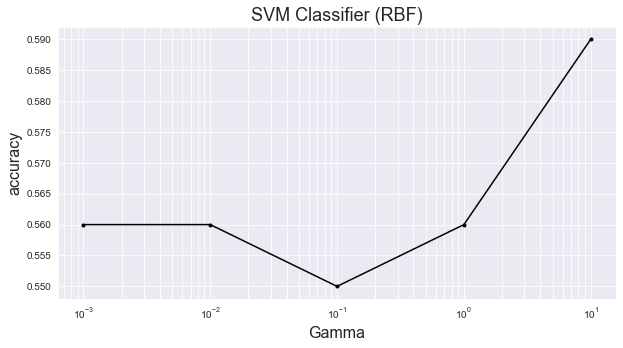

In [58]:
gamma_array = np.array([0.001, 0.01, 0.1, 1, 10])
score_array = np.zeros(len(gamma_array))
score_mu = np.zeros(len(gamma_array))
score_sigma = np.zeros(len(gamma_array))
i=0
for gamma_val in gamma_array:
    svc_class = svm.SVC(kernel='rbf', random_state=1, gamma = gamma_val)
    score_array[i] = eval_model_classifier(svc_class, X, y, 0.8)
    score_mu[i], score_sigma[i] = np.mean(score_array[i]), np.std(score_array[i])
    i=i+1


fig = plt.figure(figsize=(10,5))
plt.errorbar(gamma_array, score_mu, yerr=score_sigma, fmt='k.-')
plt.xscale('log')
plt.xlabel("Gamma",size = 16)
plt.ylabel("accuracy",size = 16)
plt.title("SVM Classifier (RBF)", size = 18)
plt.grid(which="both")
plt.show();

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

new_x = np.array(X)
new_y = np.array(y)

np.random.seed(1234)

model = Sequential()
model.add(Dense(64, input_dim = 7, kernel_initializer='random_uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [61]:
model.fit(new_x, new_y, epochs=150, batch_size=20)
scores = model.evaluate(new_x, new_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
25/25 [==============================] - 0s 838us/step - loss: 9.6402 - accuracy: 0.5320
Epoch 2/150
25/25 [==============================] - 0s 718us/step - loss: 5.1550 - accuracy: 0.5120
Epoch 3/150
25/25 [==============================] - 0s 798us/step - loss: 3.6117 - accuracy: 0.5000
Epoch 4/150
25/25 [==============================] - 0s 958us/step - loss: 1.8625 - accuracy: 0.5080
Epoch 5/150
25/25 [==============================] - 0s 997us/step - loss: 1.2764 - accuracy: 0.4720
Epoch 6/150
25/25 [==============================] - 0s 1ms/step - loss: 0.9596 - accuracy: 0.5280
Epoch 7/150
25/25 [==============================] - 0s 917us/step - loss: 0.7629 - accuracy: 0.5380
Epoch 8/150
25/25 [==============================] - 0s 878us/step - loss: 0.7259 - accuracy: 0.5340
Epoch 9/150
25/25 [==============================] - 0s 878us/step - loss: 0.6943 - accuracy: 0.5580
Epoch 10/150
25/25 [==============================] - 0s 918us/step - loss: 0.6896 - accuracy